## 03 - Preprocesamiento

En este notebook, nos centramos en la fase de preprocesamiento de los datos, un paso crucial antes de aplicar cualquier modelo de aprendizaje automático. El objetivo es preparar el conjunto de datos de manera que sea adecuado para construir el modelo de clustering

El preprocesamiento incluirá los siguientes pasos:
- Codificación de variables categóricas.
- Escalado de variables numéricas.
- Análisis de componentes principales

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../data/clean_dataset.csv")
df.sample(5)

,Education,Marital_Status,Income,Recency,Complain,Age,Customer_Days,Total_Children,Family_Load,Total_Spent,Prop_Wines,Prop_Fruits,Prop_Meat,Prop_Fish,Prop_Sweet,Prop_Gold,Total_Purchases,Prop_Web_Purchases,Prop_Catalog_Purchases,Prop_Store_Purchases,Price_Sensitivity,Monthly_Purchase_Frequency,Web_Conversion_Rate,Campaigns_Accepted
1035,Postgraduate,Partnered,28764.0,16,0,48,24,2,3,12,0.666667,0.000000,0.250000,0.000000,0.000000,0.083333,4,0.250000,0.000000,0.500000,0.250000,4.000000,0.125000,1
821,Graduate,Single,81702.0,98,0,34,644,0,0,1633,0.344764,0.030618,0.473974,0.017146,0.018983,0.114513,27,0.259259,0.259259,0.444444,0.037037,1.257764,2.333333,0
2135,Graduate,Partnered,62994.0,74,0,34,117,1,2,312,0.717949,0.038462,0.153846,0.012821,0.038462,0.038462,13,0.461538,0.153846,0.307692,0.076923,3.333333,1.000000,0
807,Graduate,Partnered,22419.0,74,0,51,437,0,1,162,0.185185,0.018519,0.290123,0.117284,0.129630,0.259259,8,0.375000,0.250000,0.250000,0.125000,0.549199,0.375000,0
1422,Graduate,Partnered,21645.0,75,0,35,664,1,2,65,0.215385,0.000000,0.353846,0.061538,0.076923,0.292308,9,0.333333,0.000000,0.333333,0.333333,0.406627,0.333333,1


Empezamos con la codificación de las variables categóricas. Dado que solo tenemos dos variables categóricas, utilizaremos One-Hot Encoding. Esta técnica evita que el modelo asuma una relación ordinal entre las categorías y permite que el algoritmo de clustering capture mejor las diferencias entre ellas. Aunque aumente algo la dimensionalidad, creemos que es la mejor opción.

In [3]:
df_pre = pd.get_dummies(df, columns=['Education', 'Marital_Status'])
df_pre = df_pre.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
df_pre.head()

,Income,Recency,Complain,Age,Customer_Days,Total_Children,Family_Load,Total_Spent,Prop_Wines,Prop_Fruits,Prop_Meat,Prop_Fish,Prop_Sweet,Prop_Gold,Total_Purchases,Prop_Web_Purchases,Prop_Catalog_Purchases,Prop_Store_Purchases,Price_Sensitivity,Monthly_Purchase_Frequency,Web_Conversion_Rate,Campaigns_Accepted,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partnered,Marital_Status_Single
0,58138.0,58,0,57,663,0,0,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,25,0.320000,0.400000,0.160000,0.120000,1.131222,1.142857,1,1,0,0,0,1
1,46344.0,38,0,60,113,2,2,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,6,0.166667,0.166667,0.333333,0.333333,1.592920,0.200000,0,1,0,0,0,1
2,71613.0,26,0,49,312,0,1,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,21,0.380952,0.095238,0.476190,0.047619,2.019231,2.000000,0,1,0,0,1,0
3,26646.0,26,0,30,139,1,2,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,8,0.250000,0.000000,0.500000,0.250000,1.726619,0.333333,0,1,0,0,1,0
4,58293.0,94,0,33,161,1,2,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,19,0.263158,0.157895,0.315789,0.263158,3.540373,1.000000,0,0,1,0,1,0


Listo, podemos pasar al escalamiento de las variables.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pre)

df_final = pd.DataFrame(df_scaled, columns=df_pre.columns)

df_final.head()

,Income,Recency,Complain,Age,Customer_Days,Total_Children,Family_Load,Total_Spent,Prop_Wines,Prop_Fruits,Prop_Meat,Prop_Fish,Prop_Sweet,Prop_Gold,Total_Purchases,Prop_Web_Purchases,Prop_Catalog_Purchases,Prop_Store_Purchases,Price_Sensitivity,Monthly_Purchase_Frequency,Web_Conversion_Rate,Campaigns_Accepted,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partnered,Marital_Status_Single
0,0.287105,0.310353,-0.09552,1.018352,1.527721,-1.264598,-1.758359,1.676245,-0.290121,0.088947,0.704290,0.445503,0.059596,-0.602949,1.317945,0.537394,2.027327,-2.076253,-0.541422,-0.361723,0.038734,0.617244,0.991895,-0.786220,-0.358569,-1.349603,1.349603
1,-0.260882,-0.380813,-0.09552,1.274785,-1.189011,1.404572,0.449070,-0.963297,-0.225781,-0.222814,-0.213734,0.031554,-0.225676,0.939234,-1.159273,-1.010249,0.192956,-0.631616,1.377412,-0.225707,-0.687541,-0.502808,0.991895,-0.786220,-0.358569,-1.349603,1.349603
2,0.913196,-0.795514,-0.09552,0.334530,-0.206048,-1.264598,-0.654644,0.280110,0.393603,0.245369,-0.679444,0.915537,-0.389362,-0.605688,0.796425,1.152607,-0.368586,0.559019,-1.192455,-0.100116,0.698985,-0.502808,0.991895,-0.786220,-0.358569,0.740959,-0.740959
3,-1.176114,-0.795514,-0.09552,-1.289547,-1.060584,0.069987,0.449070,-0.920135,-1.100244,0.466436,1.019969,1.500499,0.095402,-0.236081,-0.898513,-0.169138,-1.117309,0.757458,0.627867,-0.186319,-0.584836,-0.502808,0.991895,-0.786220,-0.358569,0.740959,-0.740959
4,0.294307,1.554453,-0.09552,-1.033114,-0.951915,0.069987,0.449070,-0.307562,-0.214645,0.940298,0.242722,0.479276,0.216458,-0.776437,0.535666,-0.036331,0.123995,-0.777835,0.746217,0.348013,-0.071308,-0.502808,-1.008171,1.271909,-0.358569,0.740959,-0.740959


Guardaremos el dtaset escalado para su posterior análisis en la fase final del proyecto:

In [5]:
df_final.to_csv("../data/df_pre.csv", index=False)

Ya tenemos el Dataset escalado, podemos pasar al último paos del preprocesamiento, reducir la dimensionalidad de este:

En este problema, hay muchos factores en base a los cuales se realizará la clasificación final. Cuanto mayor es el número de características, más difícil es trabajar con ellas. Muchas de estas características están correlacionadas y, por lo tanto, son redundantes. Por eso voy a realizar una reducción de dimensionalidad sobre las características seleccionadas antes de introducirlas en un clasificador.

Para ello utilizaré PCA, una técnica para reducir la dimensionalidad de este tipo de conjuntos de datos, aumentando su interpretabilidad y al mismo tiempo minimizando la pérdida de información.

Queremos que los componentes principales expliquen almenos el 80% de la avrianza total, asíq ue utilizaremos el gráfico del codo para ver esto

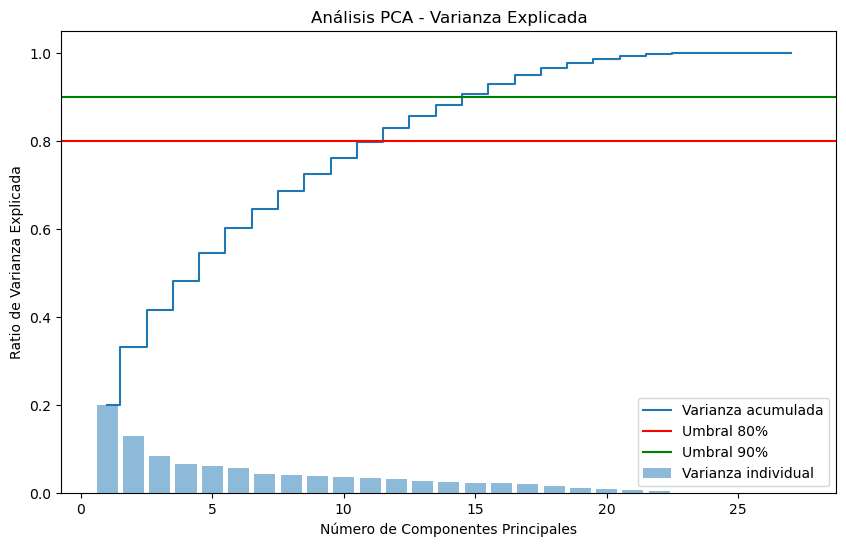

Componentes necesarios para explicar 80% de varianza: 12
Componentes necesarios para explicar 90% de varianza: 15
Componentes necesarios para explicar 95% de varianza: 17
Componente 1: 0.2014 (0.2014 acumulado)
Componente 2: 0.1309 (0.3323 acumulado)
Componente 3: 0.0836 (0.4159 acumulado)
Componente 4: 0.0672 (0.4831 acumulado)
Componente 5: 0.0618 (0.5449 acumulado)
Componente 6: 0.0574 (0.6023 acumulado)
Componente 7: 0.0432 (0.6454 acumulado)
Componente 8: 0.0407 (0.6861 acumulado)
Componente 9: 0.0395 (0.7256 acumulado)
Componente 10: 0.0371 (0.7627 acumulado)
Componente 11: 0.0347 (0.7974 acumulado)
Componente 12: 0.0323 (0.8296 acumulado)
Componente 13: 0.0276 (0.8573 acumulado)
Componente 14: 0.0249 (0.8822 acumulado)
Componente 15: 0.0241 (0.9064 acumulado)
Componente 16: 0.0232 (0.9296 acumulado)
Componente 17: 0.0205 (0.9501 acumulado)
Componente 18: 0.0156 (0.9658 acumulado)
Componente 19: 0.0125 (0.9783 acumulado)
Componente 20: 0.0091 (0.9874 acumulado)
Componente 21: 0.0

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA()
pca.fit(df_final)

# Calcular varianza explicada acumulada
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

# Crear visualización
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, label='Varianza individual')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='Varianza acumulada')
plt.axhline(y=0.8, color='r', linestyle='-', label='Umbral 80%')
plt.axhline(y=0.9, color='g', linestyle='-', label='Umbral 90%')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Número de Componentes Principales')
plt.legend(loc='best')
plt.title('Análisis PCA - Varianza Explicada')
plt.show()

# Para ver exactamente cuántos componentes necesitamos para diferentes umbrales
print(f"Componentes necesarios para explicar 80% de varianza: {np.where(cum_var_exp >= 0.8)[0][0] + 1}")
print(f"Componentes necesarios para explicar 90% de varianza: {np.where(cum_var_exp >= 0.9)[0][0] + 1}")
print(f"Componentes necesarios para explicar 95% de varianza: {np.where(cum_var_exp >= 0.95)[0][0] + 1}")

# Mostramos los valores de varianza explicada
for i, exp_var in enumerate(var_exp):
    print(f"Componente {i+1}: {exp_var:.4f} ({cum_var_exp[i]:.4f} acumulado)")

El número de dimensiones que explcian el 80% almenos es 12, así que utilizaremos PCA para reducir a 12 dimensiones:

In [6]:
pca = PCA(n_components=12)
df_pca = pca.fit_transform(df_final)

# Convertimos el resultado en un DataFrame
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(12)])

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,3.351527,-1.838077,-1.257745,-2.818160,-0.146461,-0.479492,0.581306,0.682601,-0.111216,-0.390722,-0.528998,0.718924
1,-2.015412,0.182580,-1.706491,-0.701505,1.873419,0.668666,0.111911,0.968656,-1.480279,-0.157860,-0.784517,1.263460
2,1.504060,-0.525521,1.256210,-0.102850,0.547520,0.185420,-1.868648,-0.957531,1.480359,-0.069265,-0.479595,-0.041094
3,-2.556481,-1.291555,1.282873,0.706075,1.506140,-0.236378,0.566807,-1.414818,0.239660,0.109112,-0.601048,-0.539200
4,-0.178999,0.483061,0.984848,0.981495,-0.590794,0.625593,1.799908,0.789962,0.499627,-0.485393,0.612293,-0.512976


Se nos hace imposible visualizar todos los componentes, pero probaremos a hacerlo con los 3 principales:

In [7]:
import plotly.express as px

fig = px.scatter_3d(
    df_pca.iloc[:, :3], 
    x='PC1', 
    y='PC2', 
    z='PC3',
    opacity=0.7,
    title='Visualización 3D interactiva de componentes principales'
)
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    width=900,
    height=700,
    margin=dict(l=0, r=0, b=0, t=30)
)
fig.show()

Ya tenemos todo listo para craer nuestro modelo de clustering, así que guardaremos el dataset y continuaremos en el siguiente notebook

In [8]:
df_pca.to_csv("../data/df_pca.csv", index=False)